# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

import nsfg
import first
import thinkstats2
import thinkplot

## Examples

One more time, I'll load the data from the NSFG.

In [2]:
live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [3]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


In [4]:
# Create my own rvs
first_val,first_cnt = np.unique(first_wgt_dropna, return_counts=True)
first_rv = stats.rv_discrete(values=(first_val,first_cnt/sum(first_cnt)))

other_val,other_cnt = np.unique(other_wgt_dropna, return_counts=True)
other_rv = stats.rv_discrete(values=(other_val,other_cnt/sum(other_cnt)))

In [5]:
other_rv.pk.max(), first_rv.pk.max()

(0.0374331550802139, 0.03323401329360532)

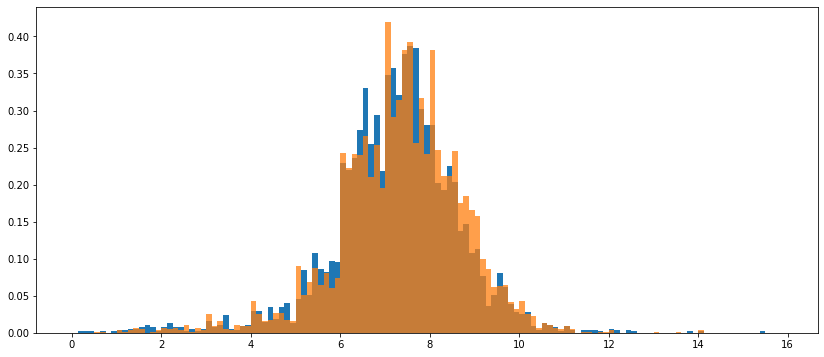

In [6]:
# Create my own plot, not really working out, can't seem to get rid of the overlap in the plot
# Would have to reindex to use bar plot so use histogram with original data, not rvs
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,6)

ax.hist(first_wgt_dropna, bins=np.arange(0,16,0.125), label='first', density=True)
ax.hist(other_wgt_dropna, bins=np.arange(0,16,0.125), label='other', density=True, alpha=.75)

plt.show()

In [7]:
# Try using reindexing method for bar plots
first_hist = first_wgt_dropna.value_counts().sort_index()
other_hist = other_wgt_dropna.value_counts().sort_index()

In [8]:
first_hist_idx_array = np.array(first_hist.index)
other_hist_idx_array = np.array(other_hist.index)

In [9]:
idx_union = np.union1d(first_hist_idx_array, other_hist_idx_array)

In [10]:
first_hist_reidx = first_hist.reindex(idx_union)
other_hist_reidx = other_hist.reindex(idx_union)

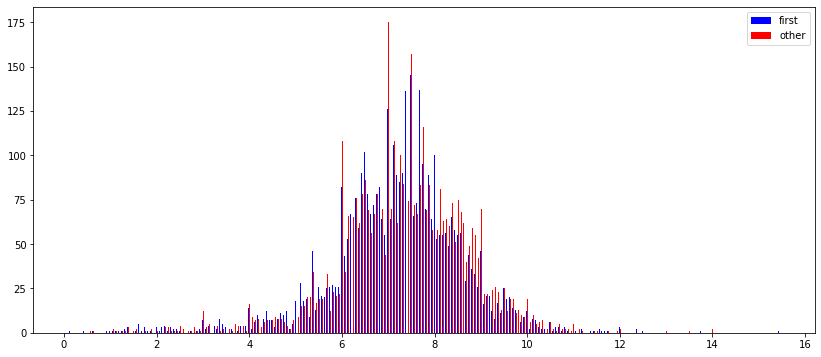

In [11]:
# Plot of reindexed series, not normalized though, and includes nans in values
fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,6)

ax.bar(first_hist_reidx.index, first_hist_reidx.values, width=-.02, align='edge', color='blue', label='first')
ax.bar(other_hist_reidx.index, other_hist_reidx.values, width=.02, align='edge', color='red', label='other')

ax.legend()

plt.show()

In [12]:
# create rvs again with reindexed series
first_hist_reidx_nan0 = np.nan_to_num(first_hist_reidx.values)
first_reidx_rv = stats.rv_discrete(values=(first_hist_reidx.index,first_hist_reidx_nan0/sum(first_hist_reidx_nan0)))

other_hist_reidx_nan0 = np.nan_to_num(other_hist_reidx.values)
other_reidx_rv = stats.rv_discrete(values=(other_hist_reidx.index,other_hist_reidx_nan0/sum(other_hist_reidx_nan0)))

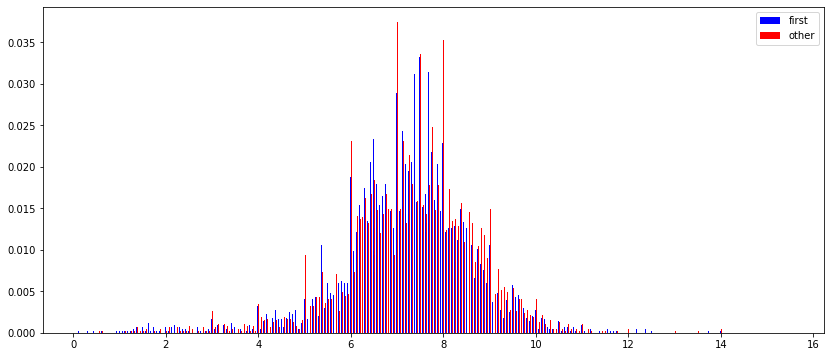

In [13]:
# plot again to show pmfs

fig,ax = plt.subplots(1,1)
fig.set_size_inches(14,6)

ax.bar(first_reidx_rv.xk, first_reidx_rv.pk, width=-.02, align='edge', color='blue', label='first')
ax.bar(other_reidx_rv.xk, other_reidx_rv.pk, width=.02, align='edge', color='red', label='other')

ax.legend()

plt.show()

In [14]:
# The x values are all the same, so the above plot should be accurate
first_reidx_rv.xk == other_reidx_rv.xk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

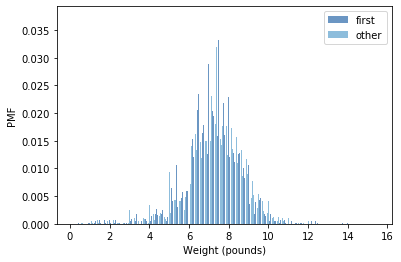

In [15]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [16]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [17]:
t = [55, 66, 77, 88, 99]

And you got the 88, your percentile rank is 80.

In [18]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [19]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [20]:
Percentile(t, 50)

77

In [21]:
t2 = [55, 66, 88, 99]

In [22]:
Percentile(t2, 50)

66

Here's a more efficient way to compute percentiles.

In [23]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [24]:
idx=80*4//100
idx

3

Let's hope we get the same answer.

In [25]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [26]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [27]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [28]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

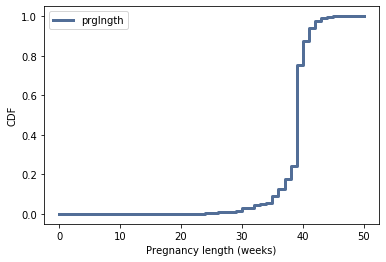

In [29]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

In [30]:
# My try
val,cnt = np.unique(live.prglngth, return_counts=True)
prglngth_rv = stats.rv_discrete(values=(val,cnt/sum(cnt)))

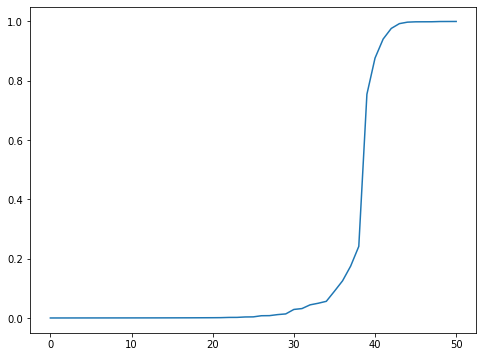

In [31]:
# Using plot
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.plot(prglngth_rv.xk, prglngth_rv.cdf(prglngth_rv.xk))

plt.show()

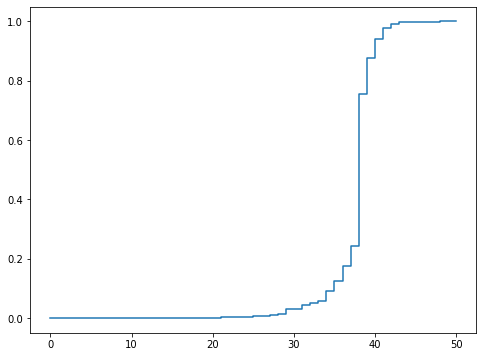

In [32]:
# Using step
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.step(prglngth_rv.xk, prglngth_rv.cdf(prglngth_rv.xk))

plt.show()

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [33]:
cdf.Prob(41)

0.9406427634455619

In [34]:
# Mine
prglngth_rv.cdf(41)

0.9406427634455619

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [35]:
cdf.Value(0.5)

39

In [36]:
# Mine, ppf does the inverse of cdf
prglngth_rv.ppf(0.5)

39.0

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

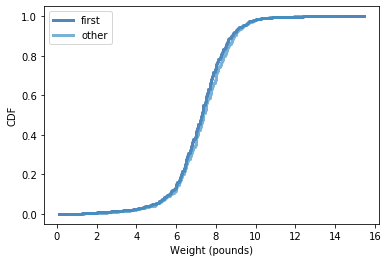

In [37]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [38]:
# Mine
f_val,f_cnt = np.unique(firsts.totalwgt_lb.dropna(), return_counts=True)
first_rv = stats.rv_discrete(values=(f_val,f_cnt/sum(f_cnt)))

o_val,o_cnt = np.unique(others.totalwgt_lb.dropna(), return_counts=True)
other_rv = stats.rv_discrete(values=(o_val,o_cnt/sum(o_cnt)))

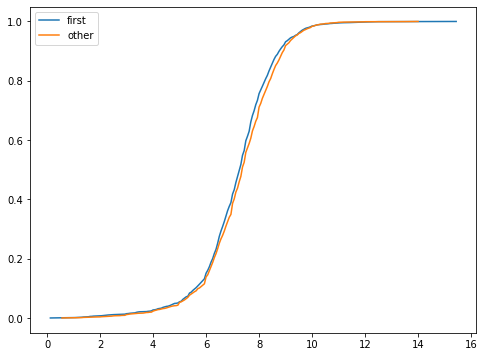

In [39]:
# Using plot
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

ax.plot(first_rv.xk, first_rv.cdf(first_rv.xk), label='first')
ax.plot(other_rv.xk, other_rv.cdf(other_rv.xk), label='other')

ax.legend()

plt.show()

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [40]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

In [41]:
# Mine
l_val,l_cnt = np.unique(live.totalwgt_lb.dropna(), return_counts=True)
live_rv = stats.rv_discrete(values=(l_val,l_cnt/sum(l_cnt)))

Again, the median is the 50th percentile.

In [42]:
median = live_cdf.Percentile(50)
median

7.375

In [40]:
# Mine
live_rv.median()

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [41]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

In [42]:
# Mine, discrete rvs don't appear to have percentile calculation methods, have to use original data
stats.iqr(live.totalwgt_lb.dropna())

1.625

In [43]:
# I was wrong above, discrete rvs do have a percentile calculation method - ppf
live_rv.ppf(.5), live_rv.ppf(.25), live_rv.ppf(.75)

(7.375, 6.5, 8.125)

In [44]:
# Mine, using original data to get iqr percentiles
stats.scoreatpercentile(live.totalwgt_lb.dropna(), 25), stats.scoreatpercentile(live.totalwgt_lb.dropna(), 75)

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [45]:
live_cdf.PercentileRank(10.2)

98.82717415357381

In [46]:
live_rv.cdf(10.2)

0.9882717415357382

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [47]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

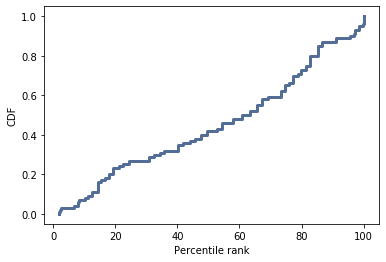

In [48]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

In [49]:
# Mine
my_sample = np.random.choice(live.totalwgt_lb.dropna(), 100, replace=True)
my_ranks = [live_rv.cdf(x) for x in my_sample]

In [50]:
my_sample_sorted = np.sort(my_sample)
my_ranks_sorted = np.sort(my_ranks)

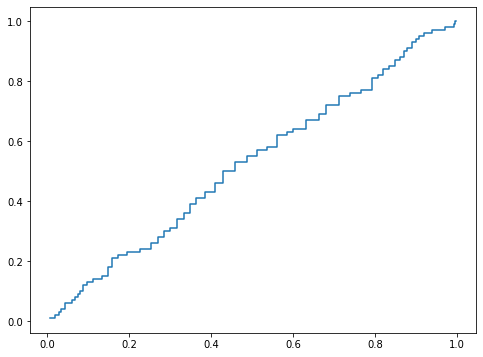

In [51]:
# Mine, this seems like a useless exercise to me since percentile rank essentially is cdf, but maybe I'm missing something
# I guess the point is to compute the percentile rank (cdf) from the original full data set rv, then the cdf from the sample one
# This is what I've done below

# Compute a new rank_rv from the sample values
rank_val,rank_cnt = np.unique(my_sample, return_counts=True)
rank_rv = stats.rv_discrete(values=(rank_val,rank_cnt/sum(rank_cnt)))

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

# Plot the percentile ranks calculated from the original full data set rv (x) vs. the cdf from the sample rv
ax.step(my_ranks_sorted, rank_rv.cdf(my_sample_sorted), where='mid')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

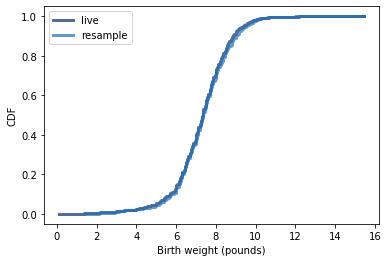

In [52]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

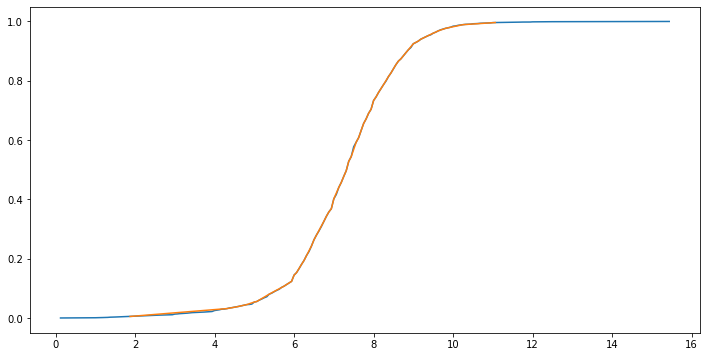

In [53]:
# Mine

my_sample2 = np.random.choice(live.totalwgt_lb.dropna(), 100, replace=True)
my_resample = [live_rv.cdf(x) for x in my_sample2]

my_sample2_sorted = np.sort(my_sample2)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)

ax.plot(live_rv.xk, live_rv.cdf(live_rv.xk), label='live')
ax.plot(my_sample2_sorted, live_rv.cdf(my_sample2_sorted), label='sample')

plt.show()

This confirms that the random sample has the same distribution as the original data.

## Exercises

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [54]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [55]:
# Compute the distribution of the live birth weights

dist = live.totalwgt_lb.dropna().value_counts().sort_index()
dist.head()

0.1250    1
0.3125    1
0.4375    1
0.5625    1
0.6250    2
Name: totalwgt_lb, dtype: int64

In [56]:
# Create an rv

dist_rv = stats.rv_discrete(values=(dist.index, dist.values/sum(dist.values)))

In [57]:
# Assume I weighed 8 pounds (average is about 7.5)

dist_rv.cdf(8), dist_rv.cdf(7.5)

(0.7332374419119274, 0.5775614073910156)

In [58]:
# Still have to do above for first babies, since I was a first
dist_first = firsts.totalwgt_lb.dropna().value_counts().sort_index()
dist_rv_first = stats.rv_discrete(values=(dist_first.index, dist_first.values/sum(dist_first.values)))

In [59]:
dist_rv_first.cdf(8), dist_rv_first.cdf(7.5)

(0.7568187027274812, 0.5977538391015357)

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [60]:
nums = np.random.random(1000)

In [61]:
val_r,cnt_r = np.unique(nums, return_counts = True)
ran_rv = stats.rv_discrete(values=(val_r, cnt_r/sum(cnt_r)))

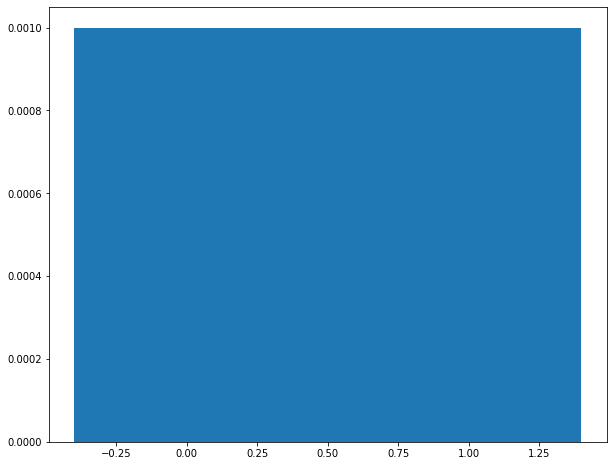

In [62]:
fig, ax = plt.subplots(1,1,)
fig.set_size_inches(10,8)

ax.bar(ran_rv.xk, ran_rv.pk)

plt.show()

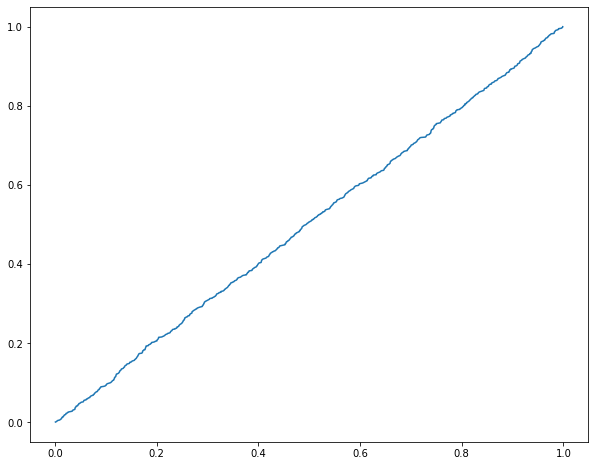

In [63]:
fig, ax = plt.subplots(1,1,)
fig.set_size_inches(10,8)

ax.plot(ran_rv.xk, ran_rv.cdf(ran_rv.xk))

plt.show()